In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import turtle
from subs2vec.vecs import Vectors
from scipy.stats import norm

sns.set_style('white')

## Define painting function
Below is the code that draws the cover art. There are a number of parameters that can be manipulated to create different artwork, but the result will generally be color fields in the style of abstract expressionists like Mark Rothko, Agnes Martin, Barnett Newman, and Helen Frankenthaler.

If you are a language or speech scientist you may also notice that some of these works bear a vague resemblance to spectrograms, which is of course not entirely by accident.

In [2]:
def paint_from_text(text, vecs_dict, smoothing=.5, strokespacing=1, fieldgap=.5, strokeweight=.15, brushwidth=10,
                    brushstroke='bevel', colormap=plt.cm.YlOrRd, colormap_reverse=True, figsize=(9, 12)):
    
    text = ''.join([l for l in text if (l.isalnum() or l.isspace())]).lower()
    text = np.array([vecs_dict[word] for word in text.split(' ') if word in vecs_dict.keys()])
    text = norm.cdf(text, scale=text.std() ** (smoothing + 1))
    
    if colormap_reverse:
        plt.rcParams['axes.prop_cycle'] = plt.cycler(
            'color',
            colormap(np.hstack([np.linspace(1, 0, len(text)), np.linspace(0, 1, len(text))]))
        )
    else:
        plt.rcParams['axes.prop_cycle'] = plt.cycler(
            'color',
            colormap(np.hstack([np.linspace(0, 1, len(text)), np.linspace(1, 0, len(text))]))
        )                        
        
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(xticklabels=[], yticklabels=[], facecolor='white')
    sns.despine(bottom=True, left=True, top=True, right=True)
    
    m = len(text)

    for i, word in enumerate(text):
        n = len(word)
        ax.plot(np.linspace(0, n, n), word + (i / (m * strokespacing)),
                alpha=strokeweight,
                linewidth=brushwidth,
                solid_joinstyle=brushstroke,
               )

    for i, word in enumerate(text):
        n = len(word)
        ax.plot(np.linspace(0, n, n), word + (-(m - i) / (m * strokespacing)) - fieldgap,
                alpha=strokeweight,
                linewidth=brushwidth,
                solid_joinstyle=brushstroke,
               )
    
    return fig, ax

## Load word vectors
These are necessary for converting the words in the text to brush strokes. I use my own word vectors (from [github.com/jvparidon/subs2vec](https://github.com/jvparidon/subs2vec)), but if you want to use this notebook to make your own art, you can also download word vectors from e.g. [fasttext.cc](https://fasttext.cc).

In [3]:
# load word vectors
vecs = Vectors('../embeddings/wiki-subs.en.1e6.vec', normalize=True)
vecs_dict = vecs.as_dict()

[INFO] loading vectors ../embeddings/wiki-subs.en.1e6.vec
[INFO] <function Vectors.__init__ at 0x145b99f70> ran in 29.495 seconds
[INFO] <function Vectors.as_dict at 0x145b9d1f0> ran in 0.719 seconds


## Read text
If you want to use this notebook to create your own art, feel free to replace the text file with something else. As long as it's a simple text file the script will clean it up. My text file is about 250 words long, using significantly longer or shorter texts will give you different (but potentially interesting!) results.

In [4]:
# read story
with open('worm_school.txt', 'r') as wormfile:
    text = wormfile.read()
print(text)

My favourite colour is brown. That's because mud is brown and I really, really, really like mud. My favourite things are other worms. And my hobby is digging holes in the ground. There is nothing I enjoy more than making a complicated underground tunnel system. But when I met Laurence, everything changed. Let me tell you about how I met him... I was digging a hole, like I usually do (like all worms do), but I must have fallen asleep because the next thing that happened was that I was flying a spaceship in outer space. The spaceship was made out of potatoes. Then, I dreamt I fell out of a can into a cereal bowl. Staring at me was a scruffy, fat bird who looked a lot like a chicken. It was a really good dream until it got to the bird part. The bird had intense and scary eyes. The worst thing was that the last part of the dream wasn't a dream at all. I really had been in a can and there really was a big, fat bird staring at me! What would you do if you were a worm and there was a bird two

## Draw cover art
This is where I draw some covers. Notice that I am varying the smoothing parameter from `0` (coarse) to `.5` (mid) to `1` (fine) below, but these are settings you can experiment with yourself if you wish to.

The brushstroke is set to `bevel` (squared off) by default because I find that looks best, but you can try `round` or `miter` (jagged) brushstrokes as well.

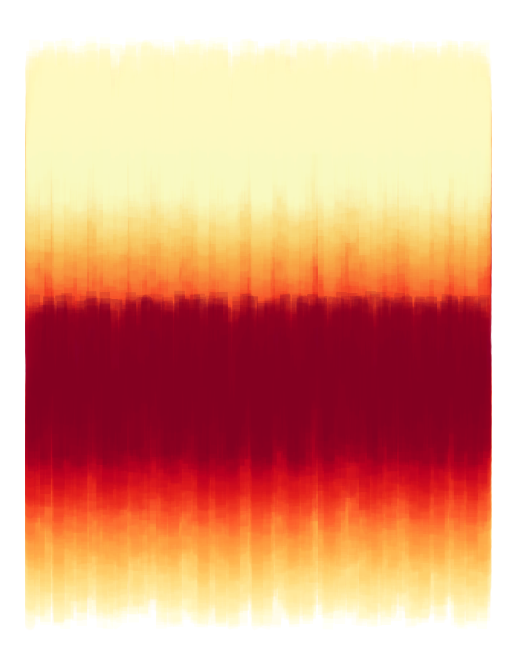

In [5]:
fig, ax = paint_from_text(text, vecs_dict, smoothing=0)
plt.savefig('covers/cover_coarse.png', dpi=300)

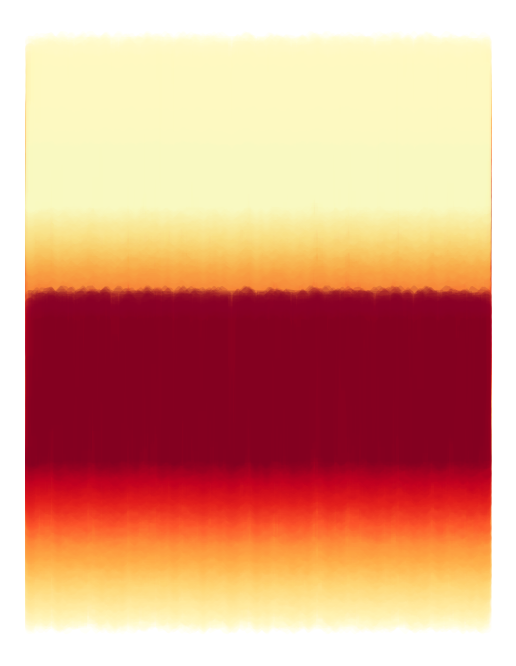

In [6]:
fig, ax = paint_from_text(text, vecs_dict, smoothing=.5)
plt.savefig('covers/cover_mid.png', dpi=300)

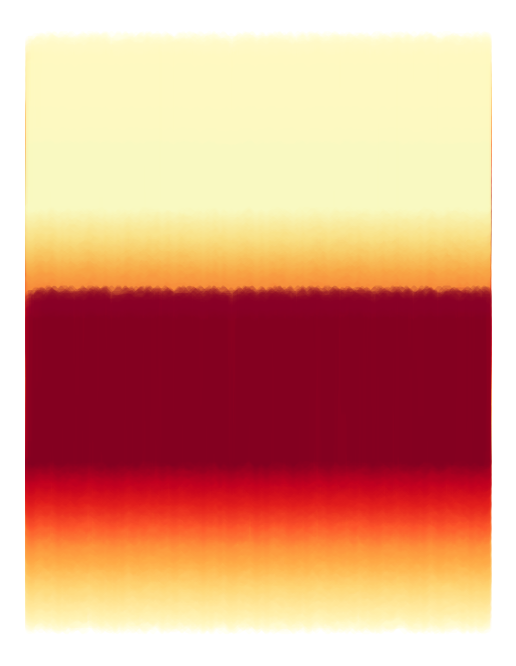

In [7]:
fig, ax = paint_from_text(text, vecs_dict, smoothing=1)
plt.savefig('covers/cover_fine.png', dpi=300)

### Colors
Another thing you can experiment with is color maps. The `paint_from_text` function takes standard matplotlib colormaps, so it's easy to experiment. I used `YlOrRd` for my thesis cover, but you can also get nice results with other monotonic maps (e.g. `BuGn`) or perceptually uniform maps like `cividis`.

See [matplotlib.org/stable/tutorials/colors/colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for options.

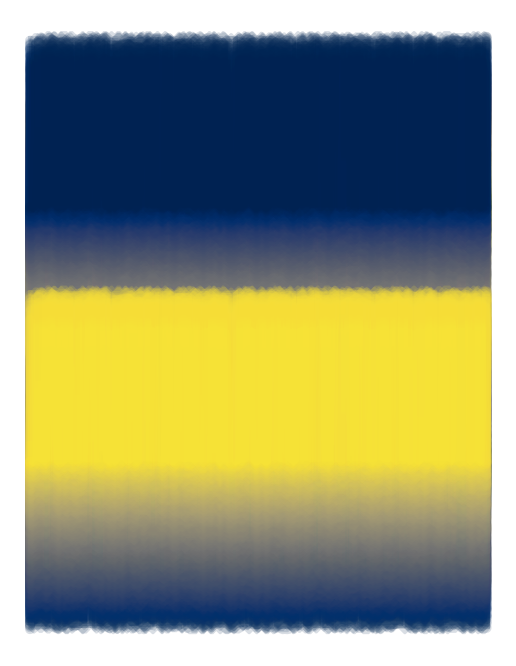

In [8]:
fig, ax = paint_from_text(text, vecs_dict, smoothing=1, colormap=plt.cm.cividis)
plt.savefig('covers/cover_cividis.png', dpi=300)

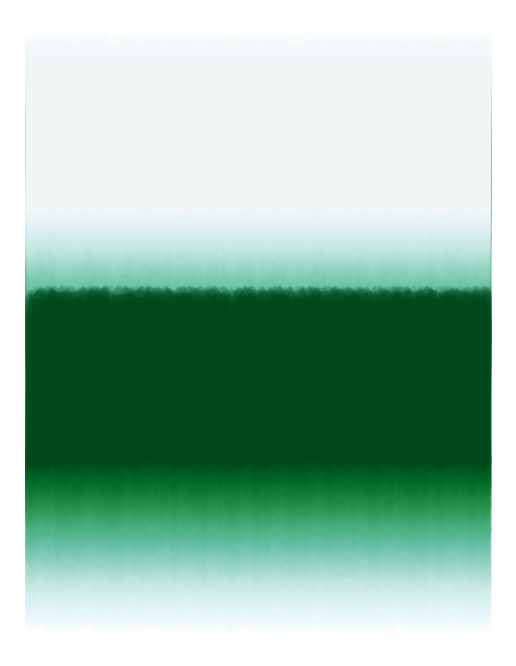

In [9]:
fig, ax = paint_from_text(text, vecs_dict, smoothing=1, colormap=plt.cm.BuGn)
plt.savefig('covers/cover_BuGn.png', dpi=300)

### Other settings
By tweaking other settings, you can also get different textures while using the same colormap. Below I use the cyclical `twilight` colormap to first make a fairly smooth and fuzzy double cream field over blue-black and red-black-blue fades. Then, I make a cream field over a blue-black-red fade, but this time the cream field is stretched out more, vertically, as well as the overall texture being much coarser, as if drawn with crayon or sharpie instead of painted. The grainy texture allows a second red-blue fade to shine through the cream field.

Experimenting with all the parameters of the `paint_from_text` function lets you create many different textures and layouts, but the basic form will always be these vertically arranged colorfields reminiscent of abstract expressionism.

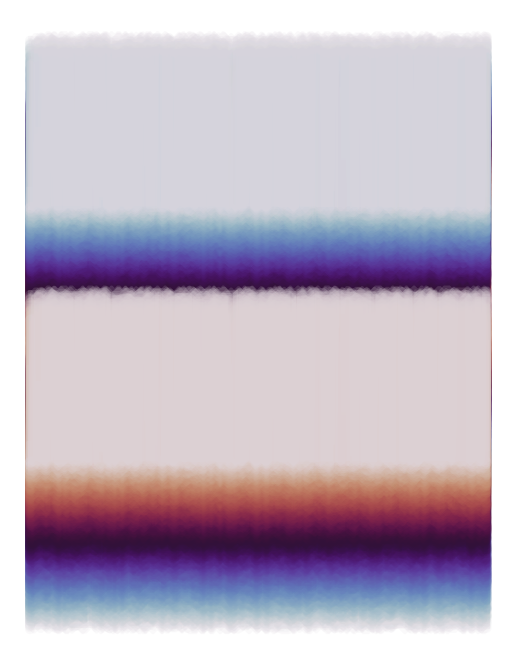

In [10]:
fig, ax = paint_from_text(text, vecs_dict, smoothing=1, colormap=plt.cm.twilight)
plt.savefig('covers/cover_twilight_1.png', dpi=300)

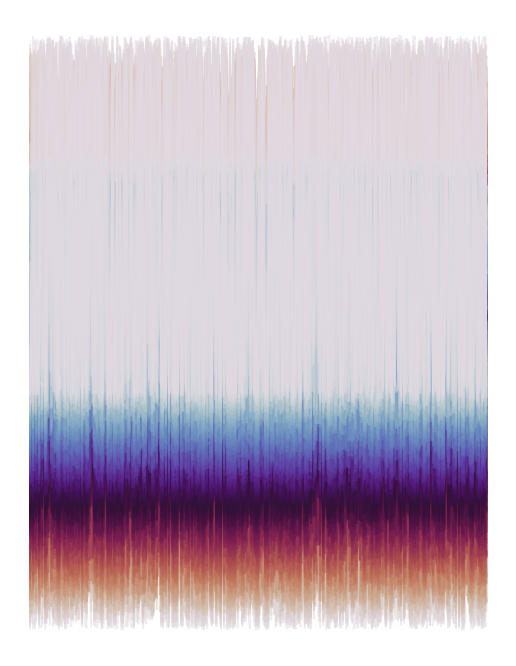

In [11]:
fig, ax = paint_from_text(text, vecs_dict, smoothing=.3, fieldgap=-.5, brushwidth=2, strokeweight=.5,
                          brushstroke='miter', colormap=plt.cm.twilight, colormap_reverse=False)
plt.savefig('covers/cover_twilight_2.png', dpi=300)